## 机器学习练习 2 - 逻辑回归¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

### 分类

In [27]:
path = 'ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam1','Exam2','Admitted'])
data.insert(0,'Ones',1)
data.head()

,Ones,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


##### 创建散点图，正负情况可视化

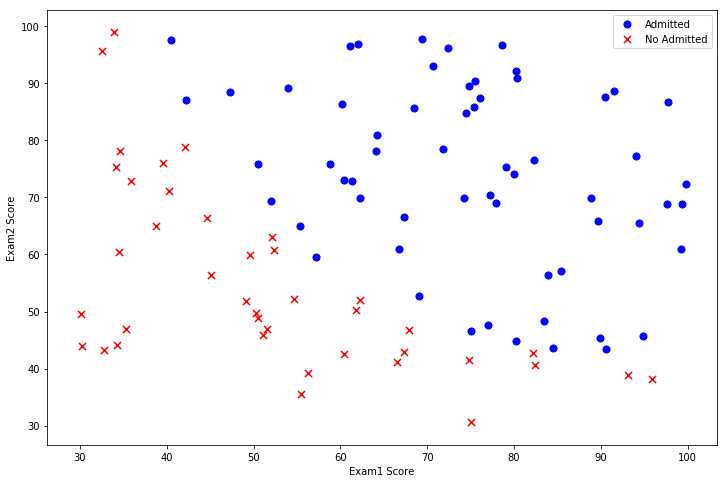

In [12]:
positive = data[data['Admitted'].isin([1])] #获取Admitted 值为1的数组，表示正的集合
negative = data[data['Admitted'].isin([0])] #获取Admitted 值为0的数组，表示负的集合

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'],positive['Exam2'],s=50,c='b',marker='o', label='Admitted')
ax.scatter(negative['Exam1'],negative['Exam2'],s=50,c='r',marker='x',label='No Admitted')
ax.legend(loc=1) #设置标注位置
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')

plt.show()

### Logistic Function 逻辑函数（Sigmoid 函数）


g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [9]:
# 定义一个Logistic函数
def sigmoid(z):
    return 1 / (1+np.exp(-z))

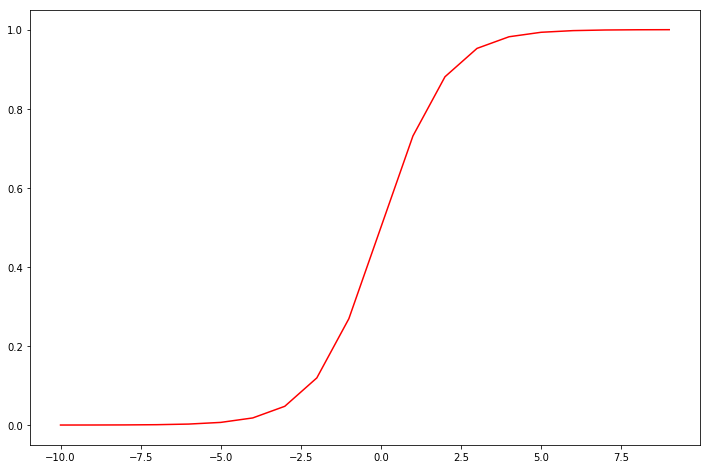

In [13]:

#测试一下函数
nums = np.arange(-10,10,step=1)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(nums,sigmoid(nums),'r')
plt.show()

### 逻辑回归的代价函数
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$$

In [14]:
#按照上面的公式，我们可以写出代价函数
def logisticCost(theta,X,y):
    #将theta数组转化为矩阵
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    
    return np.sum(first-second) / (len(X))

#### 初始化各种参数，获取X，y和theta的值

In [28]:
#获取列数
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#转化为数组
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [32]:
#测试我们上面写的logisticCost 函数
logisticCost(theta,X,y)

0.6931471805599453

### Gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： \\[\frac{1}{m} X^T( Sigmoid(X\theta) - y ) \\]
\\[{\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}} \\]

In [52]:
#设置梯度下降函数，训练我们的数据
def gradient(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T) - y
    
    for i in range(parameters):
        term  = np.multiply(error,X[:,i])
        grad[i] = np.sum(term) / len(X)
        
    return grad
#注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。

In [53]:
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

#### 可以用SciPy's truncated newton（TNC）实现寻找最优参数。

In [58]:
result = opt.fmin_tnc(func=logisticCost,x0=theta,fprime=gradient,args=(X,y))
result[0]

array([-25.16131872,   0.20623159,   0.20147149])

接下来，我们需要编写一个函数，用我们所学的参数theta来为数据集X输出预测。然后，我们可以使用这个函数来给我们的分类器的训练精度打分。
逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
当${{h}_{\theta }}$大于等于0.5时，预测 y=1

当${{h}_{\theta }}$小于0.5时，预测 y=0 。

In [18]:
def predict(theta,X):
    probability = sigmoid(X*theta.T)
    return [1 if x>0.5 else 0 for x in probability]

In [76]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
correct = [1 if ((a==1 and b ==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)]  
accuracy = (sum(map(int ,correct)) % len(correct)) #sum函数是把数组的每个元素加在一起
#list(map(int,correct)) 在python3中使用list()可以将map转化为列表
#sum(correct) 等同于上面的map方法

89

## 正则化逻辑回归

In [2]:
path = 'ex2data2.txt'
data2 = pd.read_csv(path,header=None,names=['Test 1','Test 2','Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


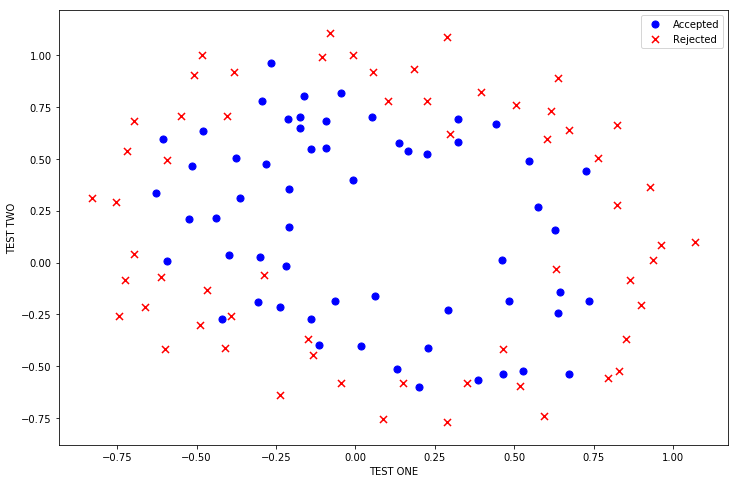

In [3]:
#初始化数据
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'],positive['Test 2'],s=50,c='b',marker='o',label='Accepted') 
ax.scatter(negative['Test 1'],negative['Test 2'],s=50,c='r',marker='x',label='Rejected')  

ax.legend()
ax.set_xlabel('TEST ONE')
ax.set_ylabel('TEST TWO')
plt.show()

In [4]:
#插入一组特征Ones
data2.insert(3,'Ones',1)

In [5]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

for i  in range(1,degree):
    for j in range(0,i):
        #numpy.power() 函数将第一个输入数组中的元素作为底数，计算它与第二个输入数组中相应元素的幂。
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2,j)
data2.drop("Test 1",axis=1,inplace=True)
data2.drop("Test 2",axis=1,inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


### Regularized Cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [14]:
# 编写我们的正则化代价函数,learningRate是上面公式中的λ
def regularized_cost_function(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid( X * theta.T)))
    second = np.multiply((1 - y),np.log(1 - sigmoid(X * theta.T)))
    #theta.shape[1]获取的是列数，下面reg中他theta的取的范围是从1-n
    reg = (learningRate /(2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]],2))      
    
    return np.sum(first - second) / len(X) + reg

请注意等式中的"reg" 项。还注意到另外的一个“学习率”参数。这是一种超参数，用来控制正则化项。现在我们需要添加正则化梯度函数：


>如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：


\\[{\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align} }\\]

>对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 

\\[{{{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}}\\]

In [26]:
#梯度下降函数
def logistic_gradientReg(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    #获取theta的列数
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i  in range(parameters):
        term = np.multiply(error,X[:,i])
        
        #0 和 其它区别对待
        if(i==0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = np.sum(term) / len(X) +((learningRate / len(X)) * theta[:,i])   
    return grad

#####   初始化变量

In [12]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

#转化为数组
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

In [15]:
#设置初始的学习率
learningRate = 1
#测试正则化函数
regularized_cost_function(theta2,X2,y2,learningRate)

0.6931471805599454

In [17]:
#使用scipy的优化函数来计算优化后的结果
result2 = opt.fmin_tnc(func=regularized_cost_function,x0=theta2,fprime=logistic_gradientReg,args=(X2,y2,learningRate))     
result2

(array([ 0.53010248,  0.29075567, -1.60725764, -0.5821382 ,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264303, -0.9503358 ,
         0.0344085 ]), 22, 1)

In [22]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min,X2)

array([ 1.00000000e+00,  5.12670000e-02,  2.62830529e-03, ...,
       -7.75143736e-03,  3.75068364e-04, -1.81484119e-05])

##### 可以使用scikit-learn 

In [24]:
from sklearn import linear_model # 调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2',C=1.0)
#y2.ravel()，将y2展开为数组
model.fit(X2,y2.ravel())

D:\AI\Python\IDE\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
model.score(X2,y2)

0.6610169491525424